In [166]:
import pandas as pd
df=pd.read_csv("GSAF5.csv", encoding="ISO-8859-1")
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [167]:
df.shape

(5992, 24)

In [168]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [169]:
df["Activity"].value_counts().head()

Surfing         904
Swimming        819
Fishing         414
Spearfishing    321
Bathing         153
Name: Activity, dtype: int64

In [170]:
df["Investigator or Source"].value_counts().head()

C. Moore, GSAF        94
S. Petersohn, GSAF    82
C. Creswell, GSAF     81
R. Collier            54
T. Peake, GSAF        48
Name: Investigator or Source, dtype: int64

In [171]:
df["Injury"].value_counts().head()

FATAL          729
Survived        97
Foot bitten     82
No injury       77
Leg bitten      71
Name: Injury, dtype: int64

In [172]:
df["Fatal (Y/N)"].value_counts()

N          4315
Y          1552
UNKNOWN      94
 N            8
F             1
#VALUE!       1
N             1
n             1
Name: Fatal (Y/N), dtype: int64

In [173]:
df["Type"].value_counts()

Unprovoked      4386
Provoked         557
Invalid          519
Sea Disaster     220
Boat             200
Boating          110
Name: Type, dtype: int64

In [174]:
df.isnull().sum()


Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [175]:
#limpio la columna "Date"
#obtener una columna que indique en que mes se produjo el ataque

import re
meses=["Jan", "Feb", "Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
#meses_numeros=["1","2","3","4","5","6","7","8","9","10","11","12"]
for i in range(len(meses)):
    df["Date"]=df["Date"].replace(meses[i],str(i+1), regex=True)
df["Date"]=df["Date"].replace("\d\d\d\d","",regex=True)
df["Date"]=df["Date"].replace("Reported ","",regex=True)
df["Date"]=df["Date"].replace("[a-zA-Z]","",regex=True)
df["Date"]=df["Date"].replace("\s","",regex=True)
df["Date"]=df["Date"].replace("\A\d\d-","",regex=True)
df["Date"]=df["Date"].replace("-\d\d\Z","",regex=True)
df["Date"]=df["Date"].replace("[^\d]|[^\d\d]","",regex=True)
def transform_mes(*mes):
    if mes[0]=="": return 0
    elif int(mes[0])>12: return 0
    else:
        return int(mes[0])
df["Date"]=df["Date"].apply(transform_mes)
df["Date"].value_counts()

7     629
0     602
8     580
9     520
1     497
6     476
4     408
12    400
3     399
10    386
5     369
11    367
2     359
Name: Date, dtype: int64

In [176]:
df["Age"].value_counts().head()

17    148
18    145
19    138
20    136
15    135
Name: Age, dtype: int64

In [177]:
#limpio la variable "Age"
a=df["Age"]
#reemplazo todo aquello que incluya caracteres no numéricos
a=a.replace("\D","",regex=True)
#escojo únicamente los dos primeros dígitos
def digitos(x):
    if len(str(x))<=2:
        return str(x)
    else:
        return str(x)[0:2]

a=a.apply(digitos)
a.value_counts().head()

#los agrupo por edades
def agrupar(x):
    try:
        if int(x)<15: return "[0-14]"
        elif int(x)>=15 and int(x)<30: return "[15-29]"
        elif int(x)>=30 and int(x)<45: return "[30-44]"
        elif int(x)>=45 and int(x)<60: return "[45-59]"
        elif int(x)>=60 and int(x)<75: return "[60-74]"
        else: return "[>75]"
    except ValueError: return "na"
a=a.apply(agrupar)
df["Age"]=a
a.value_counts()

na         2712
[15-29]    1683
[30-44]     713
[0-14]      463
[45-59]     320
[60-74]      84
[>75]        17
Name: Age, dtype: int64

In [178]:
#limpio la varibale "Activity"
df["Activity"]=df["Activity"].str.lower()
df["Activity"]=df["Activity"].replace("\d","",regex=True)
df["Activity"].value_counts()
def activity(x):
    if "windsurfing" in str(x): return "windsurfing"
    if "surfing" in str(x) or "boogie boarding" in str(x): return "surfing"
    elif "swimming" in str(x): return "swimming"
    elif "fishing" in str(x): return "fishing"
    elif "bathing" in str(x): return"bathing"
    elif "wading" in str(x): return "wading"
    elif "diving" in str(x): return "diving"
    elif "fell overboard" in str(x): return "fell overboard"
    elif "snorkeling" in str(x): return "snorkeling"
    elif "standing" in str(x): return "standing"
    else: return "others"
df["Activity"]=df["Activity"].apply(activity)
df["Activity"].value_counts()

others            1615
fishing           1122
surfing           1082
swimming          1054
diving             509
bathing            180
wading             159
standing           127
snorkeling          83
fell overboard      41
windsurfing         20
Name: Activity, dtype: int64

In [179]:
b=df["Fatal (Y/N)"]
b.value_counts()

N          4315
Y          1552
UNKNOWN      94
 N            8
F             1
#VALUE!       1
N             1
n             1
Name: Fatal (Y/N), dtype: int64

In [180]:
#limpio la variable "Fatal (Y/N)"
def convertir(x):
    if x=="N" or x=="n" or x==" N": return "N"
    if x=="Y": return "Y"
    else: return "NA"
b=b.apply(convertir)
df["Fatal (Y/N)"]=b
df["Fatal (Y/N)"].value_counts()

N     4324
Y     1552
NA     116
Name: Fatal (Y/N), dtype: int64

In [181]:
#limpio la variable "Country"
c=df["Country"]
c1=c.value_counts().to_frame().transpose()

def sum(x):
    if str(x)=="nan": return "OTHERS"
    if c1[str(x)].sum()<10: return "OTHERS"
    else: return str(x)
c=c.apply(sum)
df["Country"]=c
df["Country"].value_counts().head()

USA                 2116
AUSTRALIA           1279
SOUTH AFRICA         565
OTHERS               464
PAPUA NEW GUINEA     133
Name: Country, dtype: int64

In [182]:
#Asigno un nuevo nombre a la variable "Sex "
df["Sex "].value_counts()
df.rename(columns = {"Sex ":"Gender"}, inplace=True)

In [183]:
#limpio la variable "Gender"
d=df["Gender"]
d.value_counts()
def count(x):
    if x=="M" or x=="M " or x=="N": return "M"
    if x=="F": return "F"
    else: return "NA"
d=d.apply(count)
df["Gender"]=d
df["Gender"].value_counts()

M     4838
F      585
NA     569
Name: Gender, dtype: int64

In [184]:
#limpio la variable "Species"
df.rename(columns={"Species ":"Species"}, inplace=True)
e=df["Species"]
e=e.str.lower()
e.value_counts()
def sharks(x):
    if "white" in str(x): return "white"
    if "tiger" in str(x): return "tiger"
    if "bull" in str(x): return "bull"
    if "blue" in str(x): return "blue"
    if "mako" in str(x): return"mako"
    if "wobbegong" in str(x): return "wobbegong"
    if "blacktip" in str(x): return "blacktip"
    if "no" in str(x): return "no shark"
    if "small" in str(x): return "small shark"
    else: return "na"
e=e.apply(sharks)
df["Species"]=e
df["Species"].value_counts()

na             4426
white           646
tiger           282
bull            167
no shark        143
blacktip        102
small shark      67
blue             58
mako             56
wobbegong        45
Name: Species, dtype: int64

In [185]:
#limpio la variable "Time"
f=df["Time"].str.lower()
f.value_counts()
f=f.replace("h\d\d","", regex=True)
f=f.replace("\A0","", regex=True)
def replace(x):
    try:
        if len(str(int(x)))<=2:
            if int(x)<=6 and int(x)>22: return "night"
            if int(x)>6 and int(x)<=14: return "morning"
            if int(x)>14 and int(x)<=22: return "afternoon"
        
        else:
            if int(str(x)[0:2])<=6 and int(str(x)[0:2])>22: return "night"
            if int(str(x)[0:2])>6 and int(str(x)[0:2])<=14: return "morning"
            if int(str(x)[0:2])>14 and int(str(x)[0:2])<=22: return "afternoon"
    
    except ValueError:
        if "afternoon" in str(x) or "p.m." in str(x) : return "afternoon"
        if "morning" in str(x) or "a.m." in str(x): return "morning"
        if "night" in str(x) or "dusk" in str(x) or "evening" in str(x): return "night"
        else: return "na"
        

f=f.apply(replace)
df["Time"]=f
df["Time"].value_counts()

na           3318
morning      1416
afternoon    1061
night         122
Name: Time, dtype: int64

In [186]:
#elimino las columnas que no me interesan
df.head()
col_el=["Case Number","Location","Investigator or Source","pdf","Name","Area", "href formula","Injury","href","Case Number.1","Case Number.2","original order","Unnamed: 22","Unnamed: 23"]
df=df.drop(col_el,axis=1)
df.head()

,Date,Year,Type,Country,Activity,Gender,Age,Fatal (Y/N),Time,Species
0,9,2016,Unprovoked,USA,surfing,M,[15-29],N,morning,na
1,9,2016,Unprovoked,USA,surfing,M,[30-44],N,morning,na
2,9,2016,Unprovoked,USA,surfing,M,[30-44],N,morning,na
3,9,2016,Unprovoked,AUSTRALIA,surfing,M,na,N,na,na
4,9,2016,Unprovoked,AUSTRALIA,surfing,M,na,N,na,na


In [187]:
df_1940=df[df['Year']>1940]
df_1940["Year"].value_counts().head()

2015    139
2011    128
2014    125
2013    122
2008    121
Name: Year, dtype: int64

In [188]:
df_1940.shape

(4530, 10)

In [189]:
df_1940.head()

,Date,Year,Type,Country,Activity,Gender,Age,Fatal (Y/N),Time,Species
0,9,2016,Unprovoked,USA,surfing,M,[15-29],N,morning,na
1,9,2016,Unprovoked,USA,surfing,M,[30-44],N,morning,na
2,9,2016,Unprovoked,USA,surfing,M,[30-44],N,morning,na
3,9,2016,Unprovoked,AUSTRALIA,surfing,M,na,N,na,na
4,9,2016,Unprovoked,AUSTRALIA,surfing,M,na,N,na,na


In [190]:
df_1940["Fatal (Y/N)"].value_counts()

N     3602
Y      867
NA      61
Name: Fatal (Y/N), dtype: int64

In [191]:
# Estudio de las especies en relación con las demás variables una vez han sido limpiadas.

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

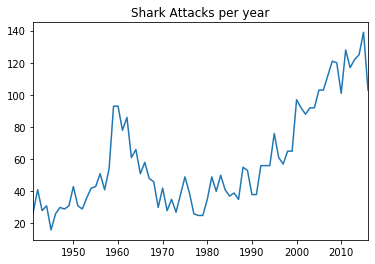

In [193]:
Years_values = df_1940['Year'].value_counts().sort_index()
%matplotlib inline
Years_values.plot(title="Shark Attacks per year")

Text(0, 0.5, 'Species')

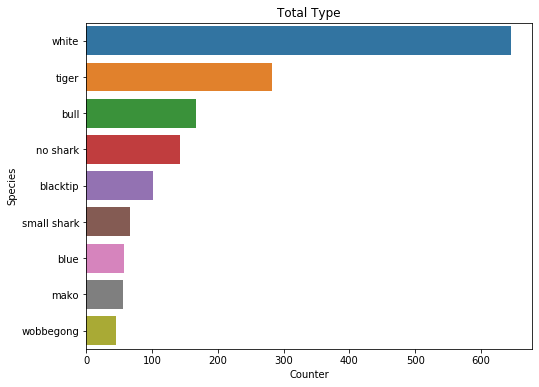

In [194]:
df_Dropspecies = df.drop(df[df['Species']=="na"].index,axis=0)
table_count = df_Dropspecies['Species'].value_counts()
type_index = table_count.index
type_values = table_count.values

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = type_values , y = type_index , ax =ax , orient='h')
plt.title('Total Type')
plt.xlabel('Counter')
plt.ylabel('Species')

Text(0.5, 1.0, 'Species vs Year(2006-2016)')

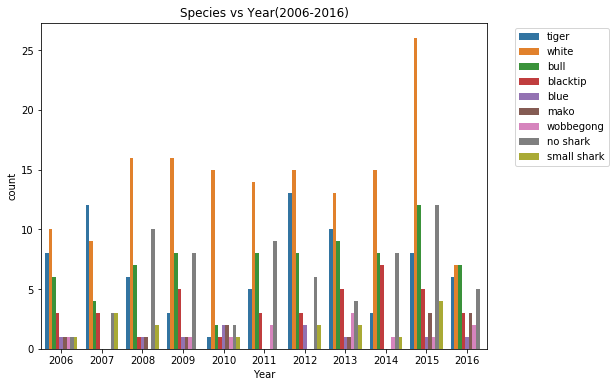

In [195]:
year_range = np.arange(2006,2017).tolist()
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data =df_Dropspecies[df_Dropspecies['Year'].isin(year_range)],x='Year',hue='Species',ax=ax)
plt.legend(loc='best',bbox_to_anchor=(1.05, 1))
plt.title('Species vs Year(2006-2016)')



Text(0.5, 1.0, 'Species vs Month')

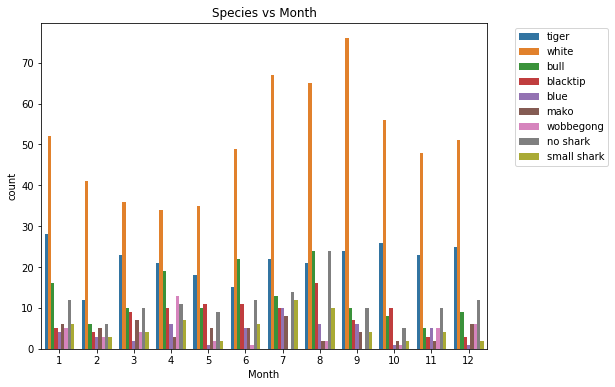

In [196]:
df_Dropspecies0 = df_Dropspecies.drop(df_Dropspecies[df_Dropspecies['Date']==0].index,axis=0)
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data =df_Dropspecies0,x='Date' ,hue='Species',ax=ax)
plt.xlabel('Month')
plt.legend(loc='best',bbox_to_anchor=(1.05, 1))
plt.title('Species vs Month')

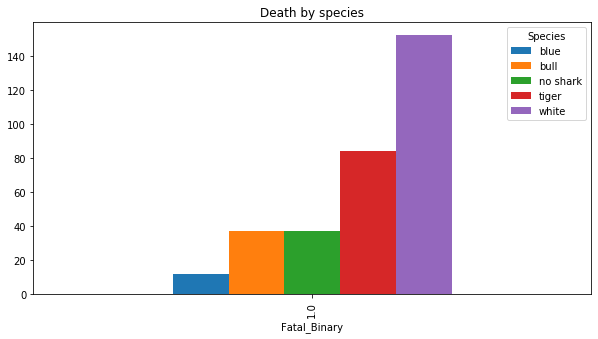

In [197]:
df_Dropspecies1['Fatal_Binary'] = df_Dropspecies[df_Dropspecies['Fatal (Y/N)'].isin(['Y','N'])]['Fatal (Y/N)']
df_Dropspecies1['Fatal_Binary'] = df_Dropspecies1['Fatal_Binary'].str.replace('N',"0").str.replace('Y',"1").dropna().astype(int)
df_Dropspecies1[df_Dropspecies1["Fatal_Binary"]==1]\
  .groupby("Species").filter(lambda x: len(x) > 10)\
  .groupby(["Species","Fatal_Binary"])\
  .size().to_frame().unstack(level=0)[0].plot.bar(title='Death by species',figsize=[10,5])

Text(0.5, 1, 'Species vs Activity\n')

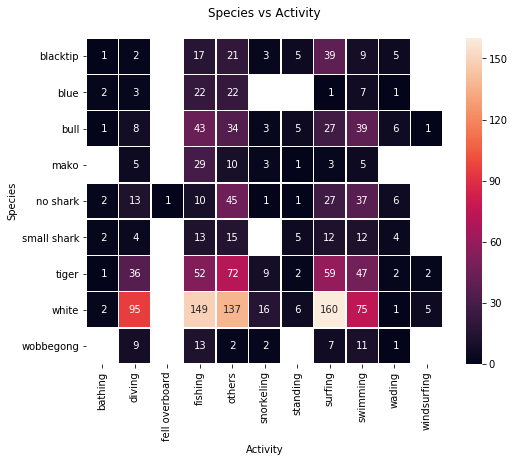

In [198]:
table_count = pd.pivot_table(data = df_Dropspecies,
                             index = ['Species'],
                             columns=['Activity'],
                             values = ['Year'],
                             aggfunc = 'count')
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(table_count['Year'],ax=ax,annot=True,fmt='2.0f',vmin=0,linewidth=.5)
plt.title('Species vs Activity\n')

Text(0.5, 1, 'Species vs Country\n')

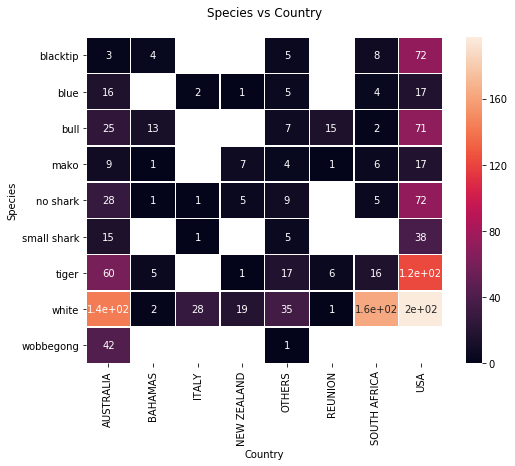

In [199]:
table_count = df_Dropspecies.groupby(df_Dropspecies['Country'])['Species'].size()
table_count = table_count.sort_values(ascending=False)[:8]
table_count_index = table_count.index
table_count_values = table_count.values

table_count = pd.pivot_table(data = df_Dropspecies[df_Dropspecies['Country'].isin(table_count_index)],
               index = ['Species'],columns=['Country'],values=['Year'],aggfunc='count')
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(table_count['Year'],ax=ax,vmin=0,linewidth=.5,annot=True)
plt.title('Species vs Country\n')

Text(0.5, 1, 'Species vs Age\n')

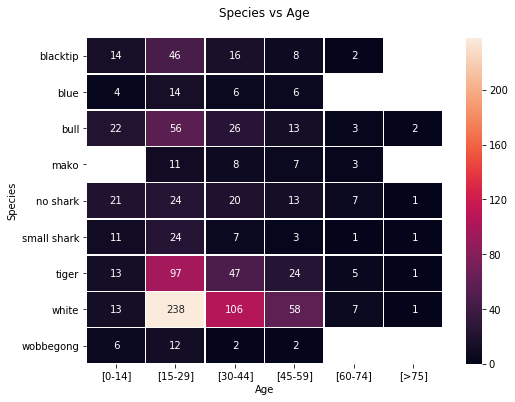

In [200]:
df_Dropspeciesage = df_Dropspecies.drop(df_Dropspecies[df_Dropspecies['Age']=="na"].index,axis=0)
table_count = pd.pivot_table(data = df_Dropspeciesage,
                             index = ['Species'],
                             columns=['Age'],
                             values = ['Year'],
                             aggfunc = 'count')
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(table_count['Year'],ax=ax,annot=True,fmt='2.0f',vmin=0,linewidth=.5)
plt.title('Species vs Age\n')

Text(0.5, 1, 'Species vs Time\n')

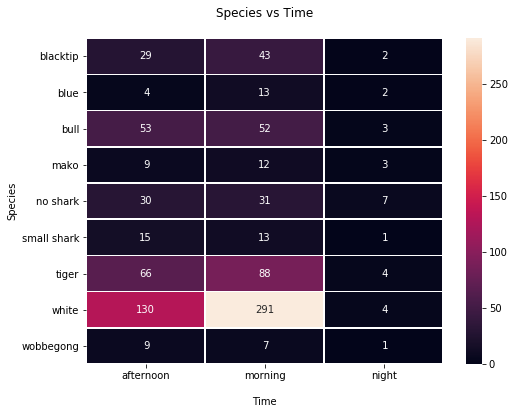

In [201]:
df_Dropspeciestime = df_Dropspecies.drop(df_Dropspecies[df_Dropspecies['Time']=="na"].index,axis=0)
table_count = pd.pivot_table(data = df_Dropspeciestime,
                             index = ['Species'],
                             columns=['Time'],
                             values = ['Year'],
                             aggfunc = 'count')
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(table_count['Year'],ax=ax,annot=True,fmt='2.0f',vmin=0,linewidth=.5)
plt.xlabel('\nTime')
plt.title('Species vs Time\n')